In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Training Dataset:\n", train_data.head())
print("\nTest Dataset:\n", test_data.head())


Training Dataset:
               TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  '#SecKerry: The value of the @StateDept and @U...  
1                            '@rraina1481 I fear so'  
2  'Watch video highlights of the #wwc13 final be...  
3  'RT @chelscanlan: At Nitro Circus at #AlbertPa...  
4  '@cricketfox Always a good thing. Thanks for t...  

Test Dataset:
               TweetId                                          TweetText
0  306486520121012224  '28. The home side threaten again through Maso...
1  286353402605228032  '@mrbrown @aulia Thx for asking. See http://t....
2  289531046037438464  '@Sochi2014 construction along the shores of t...
3  306451661403062273  '#SecKerry\u2019s remarks after meeting with F...
4  297941800658812928  'The #IPLauction has begun. Ricky Po

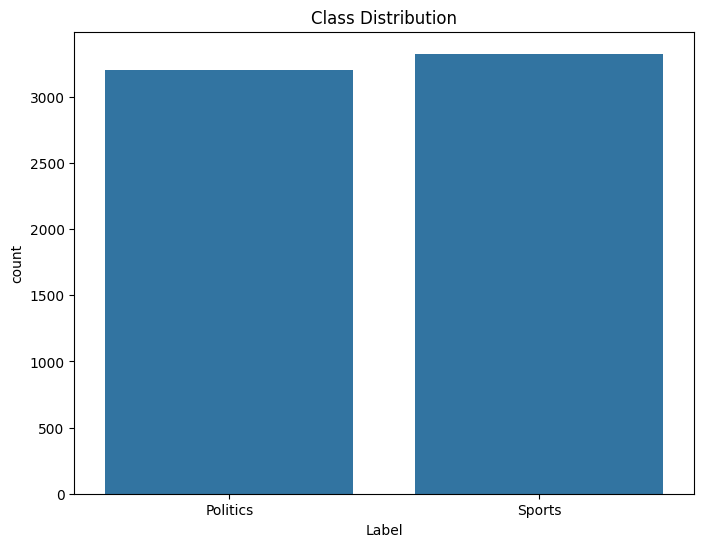

In [62]:
# Visualize the classes distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=train_data)
plt.title('Class Distribution')
plt.show()

In [63]:
# Text Preprocessing
def preprocess_text(text):
    # remove special characters and convert to lowercase
    text = text.lower().replace("'", "")
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply text preprocessing to the training and test datasets
train_data['ProcessedText'] = train_data['TweetText'].apply(preprocess_text)
test_data['ProcessedText'] = test_data['TweetText'].apply(preprocess_text)


In [64]:
# Feature Extraction
X = train_data['ProcessedText']
y = train_data['Label']

In [ ]:
['ProcessedText']
y = train_data['Label']

In [65]:
# train_test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

# Convert text to numerical representation 
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Label Encoding for target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Model Training
model = LogisticRegression(random_state=40)
model.fit(X_train_tfidf, y_train_encoded)

# Model Evaluation 
y_val_pred = model.predict(X_val_tfidf)

In [66]:
# the model performance  
accuracy = accuracy_score(y_val_encoded, y_val_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_val_encoded, y_val_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_encoded, y_val_pred))

Accuracy: 0.946360153256705

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       621
           1       0.95      0.95      0.95       684

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305


Confusion Matrix:
[[586  35]
 [ 35 649]]


In [60]:
# Apply text preprocessing and TF-IDF vectorization to the test dataset
test_data_tfidf = tfidf_vectorizer.transform(test_data['ProcessedText'])

# Generate predictions on the test set
test_predictions = model.predict(test_data_tfidf)

# Decode label encoding for submission
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'TweetId': test_data['TweetId'],
    'Label': test_predictions_labels
})

# Display the first few rows of the submission DataFrame
print("\nSubmission DataFrame:")
print(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


Submission DataFrame:
              TweetId     Label
0  306486520121012224    Sports
1  286353402605228032    Sports
2  289531046037438464  Politics
3  306451661403062273  Politics
4  297941800658812928    Sports


In [67]:
# apply the model on new tweets 


new_tweets = [
    "Exciting conference  happening today!",
    "vollyeball enthusiasts gearing up for the big game!",
    "What are your thoughts on the current state situation?",
    "Training hard for the upcoming  tournament!"
]

# Preprocess the new tweets
processed_new_tweets = [preprocess_text(tweet) for tweet in new_tweets]

# Convert text to numerical representation using TF-IDF
new_tweets_tfidf = tfidf_vectorizer.transform(processed_new_tweets)

# Make predictions 
new_tweets_predictions = model.predict(new_tweets_tfidf)

# Decode label encoding 
new_tweets_predictions_labels = label_encoder.inverse_transform(new_tweets_predictions)

# Display predictions for each new tweet
for tweet, prediction in zip(new_tweets, new_tweets_predictions_labels):
    print(f"Tweet: {tweet}\nPredicted Label: {prediction}\n{'-'*30}")


Tweet: Exciting conference  happening today!
Predicted Label: Politics
------------------------------
Tweet: vollyeball enthusiasts gearing up for the big game!
Predicted Label: Sports
------------------------------
Tweet: What are your thoughts on the current state situation?
Predicted Label: Politics
------------------------------
Tweet: Training hard for the upcoming  tournament!
Predicted Label: Sports
------------------------------
